In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = "../images/license10.jpg"

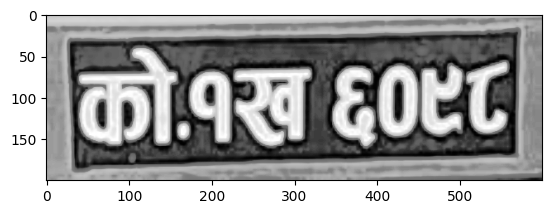

In [3]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (600, 200))

equalized = cv2.equalizeHist(image)


plt.imshow(equalized, cmap='gray')

In [4]:
# contrast stretching
# contrast_image = cv2.equalizeHist(image)

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# contrast_image = clahe.apply(image)

# plt.imshow(contrast_image, cmap='gray')

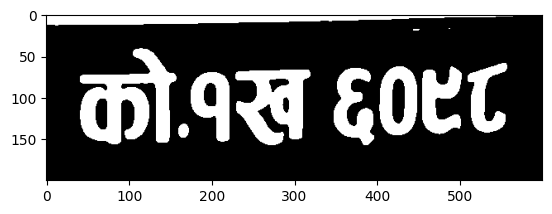

In [5]:
blurred = cv2.GaussianBlur(image,(5,5),0)
# thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
# plt.imshow(thresh, cmap='gray')

ret, thresh = cv2.threshold(blurred,125,255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')


In [6]:
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [7]:
image.shape

(200, 600)

In [8]:
total_pixels = image.shape[0] * image.shape[1]
lower = 100
upper = total_pixels * 0.2

In [9]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # label 0 vaneko background ho
    if label == 0:
        continue

    # otherwise construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # Get the bounding box of the connected component
    (y, x) = np.where(labels == label)
    (topY, topX) = (np.min(y), np.min(x))
    (bottomY, bottomX) = (np.max(y), np.max(x))
    width = bottomX - topX
    height = bottomY - topY

    # filtering the bounding box
    if width > 250 or height > 250:
        continue

    # more filtering
    if width > 20 and height > 20:
        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)


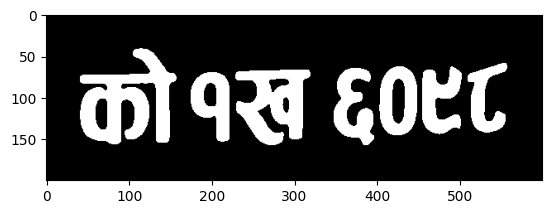

In [10]:
plt.imshow(mask,cmap='gray')

In [11]:
# Find contours and get bounding box for each contour
contours, hierarchy= cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in contours]
boundingBoxes

[(175, 70, 47, 84),
 (229, 67, 91, 91),
 (348, 65, 49, 93),
 (455, 63, 48, 82),
 (403, 63, 46, 83),
 (510, 59, 48, 84),
 (41, 41, 117, 116)]

In [12]:
import functools

In [13]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [14]:
# boundingBoxes = [bbox for bbox in boundingBoxes if bbox[2] * bbox[3] > 1600]
boundingBoxes = [bbox for bbox in boundingBoxes if bbox[2] * bbox[3] > 1300 and bbox[2] / bbox[3] <= 4 and bbox[3] / bbox[2] <= 4]
print(boundingBoxes)

[(41, 41, 117, 116), (175, 70, 47, 84), (229, 67, 91, 91), (348, 65, 49, 93), (403, 63, 46, 83), (455, 63, 48, 82), (510, 59, 48, 84)]


In [15]:
test = cv2.imread(image_path)
test = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
test = cv2.resize(test, (600, 200))


In [16]:
for i, bbox in enumerate(boundingBoxes):
    x, y, w, h = bbox
    if x > 5 and y > 10:
            padding = 10
    else:
            padding = 0
    padding = 0
    cropped_image = test[y-padding:y+h+padding, x-padding:x+w+padding]
    cv2.imwrite(f'./results/cropped_image_{i}.png', cropped_image)


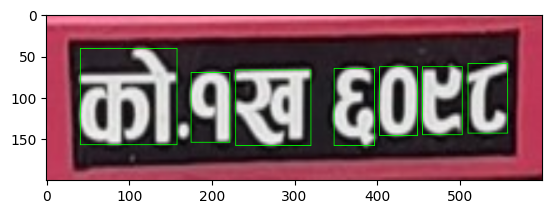

In [17]:
for bbox in boundingBoxes:
    x, y, w, h = bbox
    cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.imshow(test)

In [18]:
cv2.imwrite('./results/final_image.png', test)

True

In [19]:
# while True:
#     cv2.imshow('mask',mask_image_resized)
#     if cv2.waitKey(10) & 0xFF == 27:
#         break
# cv2.destroyAllWindows()